In [1]:
import trace_file_processor as tp
import oracle_generator as orac_gen

import matplotlib.pyplot as plt
import math as math

import numpy as np

In [2]:
trace = 'TMobile-UMTS-driving.up'
gran = 250

In [3]:
rate, time = tp.process_trace(trace, gran)

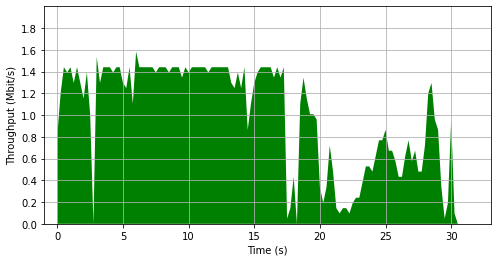

In [4]:
plt.figure(figsize=(8, 4))
plt.fill_between(time[0:500], 0, rate[0:500], facecolor='green')
plt.ylim((0, 2))
plt.xlim((-1, 33))
plt.yticks(np.arange(0, 2, 0.2))
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbit/s)")
plt.grid()
plt.show()
#plt.savefig('proccessed.png')

In [5]:
tp.store_to_csv(np.concatenate(([gran], rate)), time, gran, "rate.txt", version="throughput")

In [6]:

def plot_oracle_and_truth(trace, gran):
    
    rate, time = tp.process_trace(trace, gran)
    
    plt.figure(figsize=(8, 4))

    #create oracle

    time_length = 30 # in sec

    samples = 1000*(time_length - orac_gen.PANTH_DELAY_FACTOR)/gran
    samples = int(math.ceil(samples))

    samples_ground_truth = int(1000*time_length/gran)

    oracle_name = 'oracle.txt'

    orac_gen.create_oracle_data(trace, gran, orac_gen.PANTH_DELAY_FACTOR, oracle_name)

    #Will give us rate in Mbit/s
    conversion_factor = (8/(gran*0.001))/(1e6)

    # Read the oracle file
    ora_tp = orac_gen.read_oracle(oracle_name)[0:samples]
    ora_tp = np.multiply(conversion_factor, ora_tp) #to get rate


    # Plot the oracle file

    extra_points = int(math.ceil(1000*orac_gen.PANTH_DELAY_FACTOR/gran))

    ora_ts = [(gran/1000)*(k+1) for k in range(len(ora_tp) + extra_points)]


    #Make sure ora_tp has same dimensions as well
    ora_tp = np.concatenate((np.repeat(0, extra_points), ora_tp))

    plt.plot(ora_ts, ora_tp, label='Oracle', color='red', linewidth=0.6)

    # Plot the ground truth

    plt.plot(time[:samples_ground_truth], rate[:samples_ground_truth], label='Pantheon', color='green', linewidth=0.6)

    plt.grid()



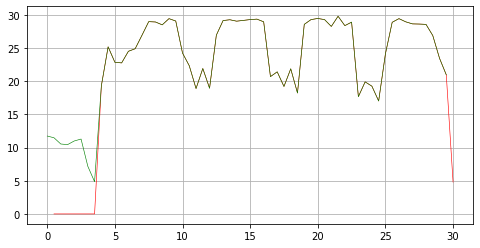

In [8]:
plot_oracle_and_truth('example.trace', 500)